In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [4]:
df = pd.read_csv('iris.csv')
df

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


### Задание 1.1
Какой вид в датасете представлен больше всего, какой – меньше?

<Axes: xlabel='Species'>

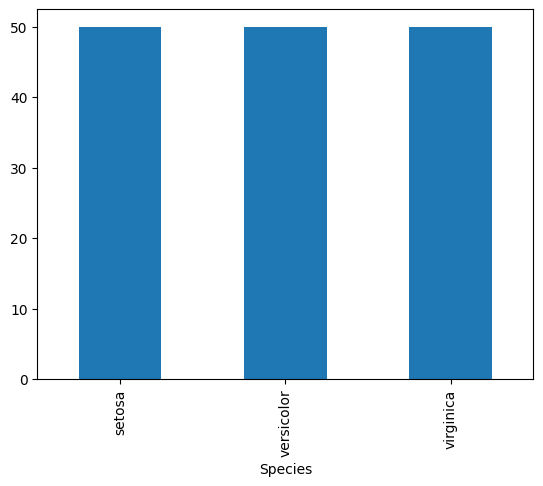

In [5]:
gr_species = df.groupby('Species')['Species'].count()
gr_species.plot(kind='bar')

Нагядно видно, что все виды здесь представлены в равном объеме (по 50 строк данных для каждого из 3 видов)

### Задание 1.2
Рассчитайте выборочное среднее, выборочную дисперсию, выборочную
медиану и выборочную квантиль порядка 2/5 для суммарной площади (более точно –
оценки площади) чашелистика и лепестка всей совокупности и отдельно для каждого
вида

In [6]:
df['Sepal.Square'] = df['Sepal.Length'] * df['Sepal.Width']
df['Petal.Square'] = df['Petal.Length'] * df['Petal.Width']
df['Sum.Square'] = df['Sepal.Square'] + df['Petal.Square']
df

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,Sepal.Square,Petal.Square,Sum.Square
0,5.1,3.5,1.4,0.2,setosa,17.85,0.28,18.13
1,4.9,3.0,1.4,0.2,setosa,14.70,0.28,14.98
2,4.7,3.2,1.3,0.2,setosa,15.04,0.26,15.30
3,4.6,3.1,1.5,0.2,setosa,14.26,0.30,14.56
4,5.0,3.6,1.4,0.2,setosa,18.00,0.28,18.28
...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,20.10,11.96,32.06
146,6.3,2.5,5.0,1.9,virginica,15.75,9.50,25.25
147,6.5,3.0,5.2,2.0,virginica,19.50,10.40,29.90
148,6.2,3.4,5.4,2.3,virginica,21.08,12.42,33.50


In [7]:
sel_cols = df[['Sum.Square']]
sf = pd.DataFrame()
sf['Выборочное среднее'] = sel_cols.mean()
sf['Выборачная дисперсия'] = sel_cols.var()
sf['Выборачная медиана'] = sel_cols.median()
sf['Выборачый квантиль 2/5'] = sel_cols.quantile(2/5)
sf.rename(index={'Sepal.Square': 'Площадь чашелистов', 'Petal.Square': 'Площадь лепестков'}, inplace=True)
sf.index = ["Сумарная площадь"]
sf.round(3)

,Выборочное среднее,Выборачная дисперсия,Выборачная медиана,Выборачый квантиль 2/5
Сумарная площадь,23.617,47.909,22.5,20.316


In [8]:
def quantile40():
    def quantile(x):
        return x.quantile(2/5)
    return quantile

gsf = df[['Sum.Square', 'Species']].groupby('Species').agg(['mean', 'var', 'median', quantile40()]).round(3)
gsf.columns = ['Выборочное среднее','Выборочная дисперсия', 'Выборочная медиана','Выборочная квантиль 2/5']
gsf.rename_axis('Вид', inplace=True)
gsf

,Выборочное среднее,Выборочная дисперсия,Выборочная медиана,Выборочная квантиль 2/5
Вид,,,,
setosa,17.623,8.940,17.660,16.736
versicolor,22.247,15.834,22.210,21.142
virginica,30.981,27.005,31.475,29.716


### Задание 1.3
Построить график эмпирической функции распределения, гистограмму и box-plot
суммарной площади чашелистика и лепестка для всей совокупности и каждого вида

RuntimeError: Cumulative KDE evaluation requires scipy

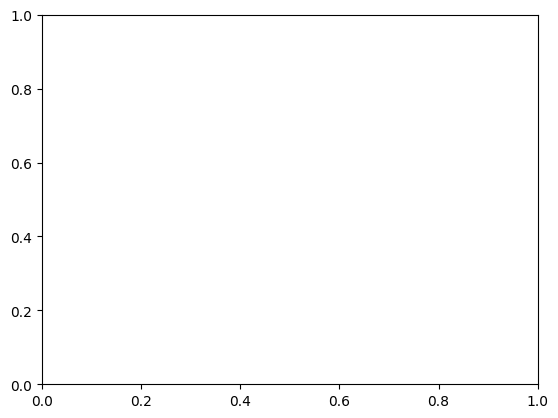

In [9]:
ax = sns.kdeplot(df['Sum.Square'], cumulative=True)
ax.set_title("Все виды")
ax.set_xlabel("")


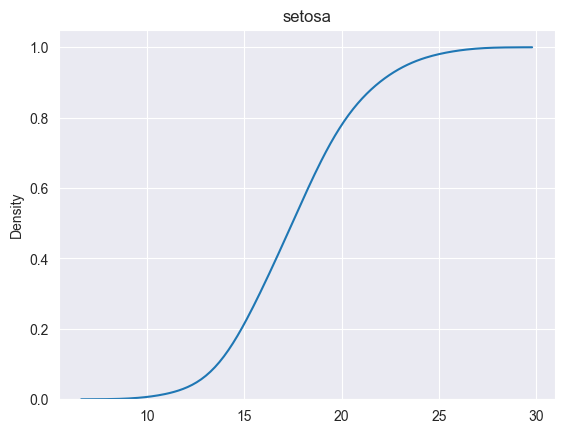

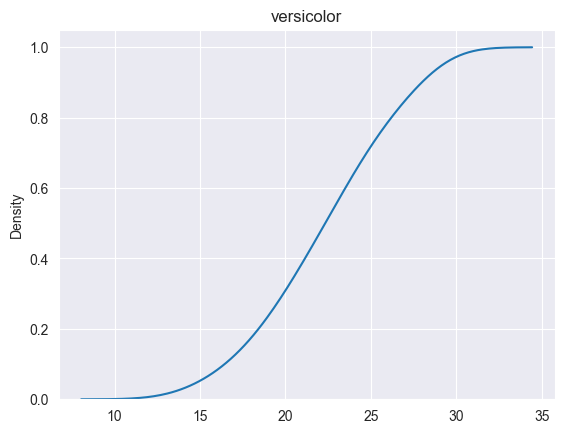

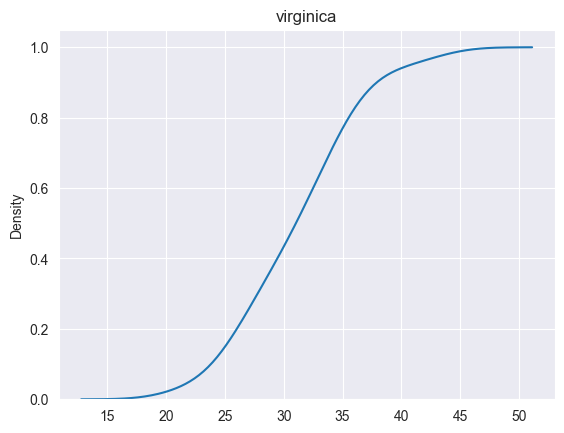

In [13]:
for el in df['Species'].unique():
    plt.figure()
    ax = sns.kdeplot(df[df['Species'] == el]['Sum.Square'], cumulative=True)
    ax.set_title(el)
    ax.set_xlabel("")

array([<Axes: ylabel='Frequency'>], dtype=object)

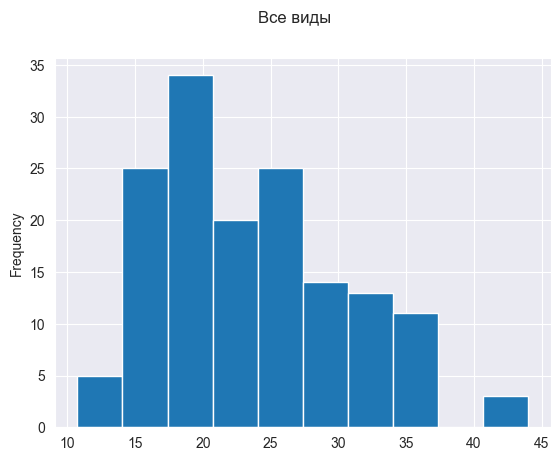

In [14]:
df['Sum.Square'].plot(kind='hist',subplots=True,sharex=True,sharey=True, title="Все виды")

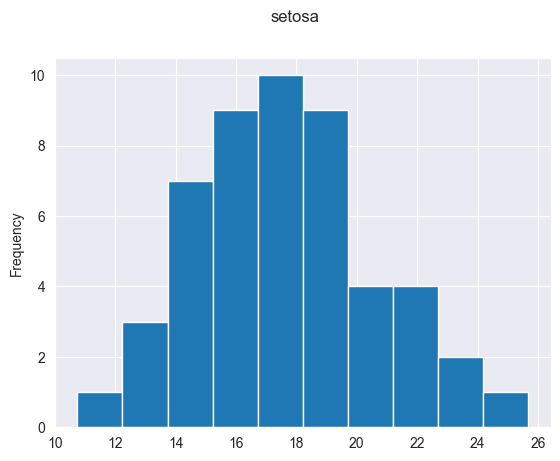

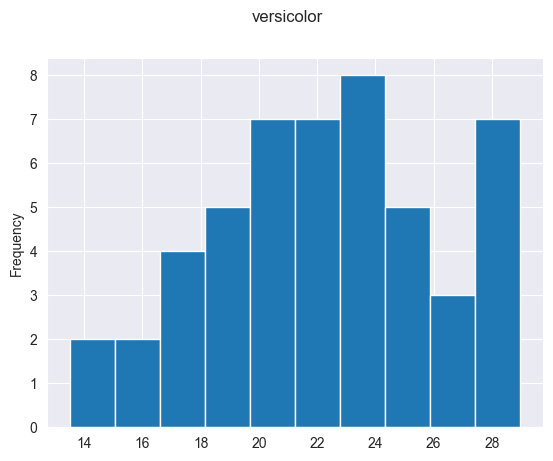

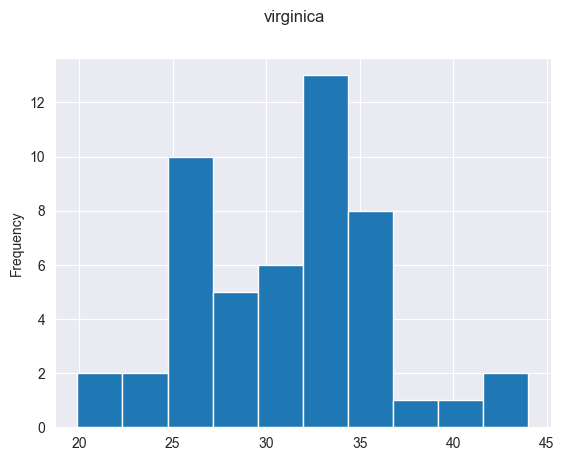

In [15]:
for el in df['Species'].unique():
    plt.figure()
    df[df['Species'] == el]['Sum.Square'].plot(kind='hist',subplots=True, sharex=True,sharey=True, title=el)

Sum.Square    Axes(0.125,0.11;0.775x0.77)
dtype: object

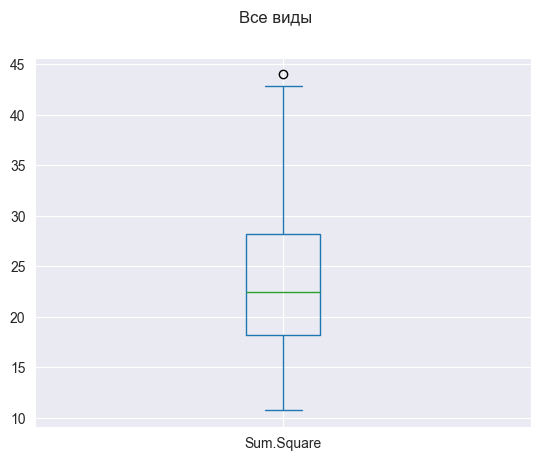

In [16]:
df['Sum.Square'].plot(kind='box',subplots=True,sharex=True,sharey=True, title="Все виды")

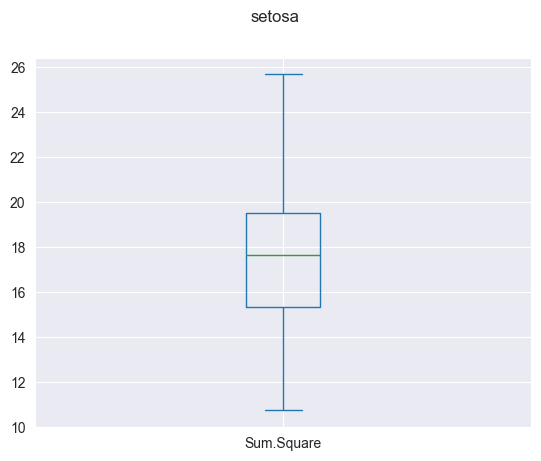

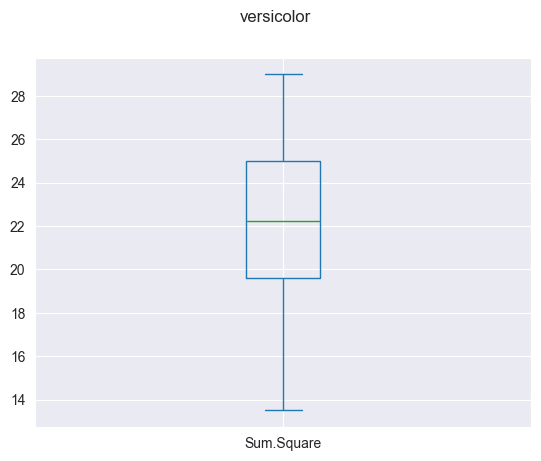

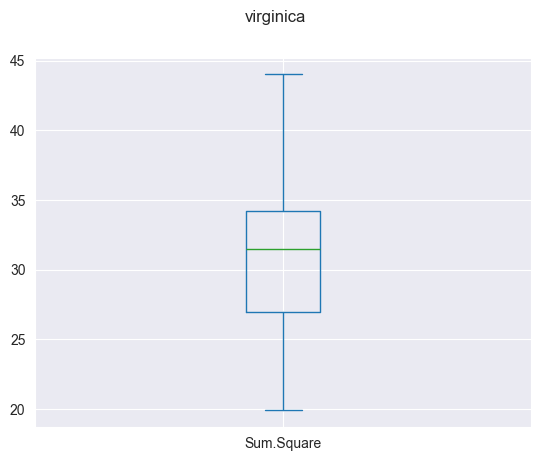

In [17]:
for el in df['Species'].unique():
    plt.figure()
    df[df['Species'] == el]['Sum.Square'].plot(kind='box',subplots=True,sharex=True,sharey=True, title=el)

### Задание 2.1
Предположите, какому вероятностному закону соответствует распределение показателя, рассмотренного (расчет выборочных характеристик и визуализация) в задании №1. Оцените параметры данного распределения методом максимального правдоподобия или методом моментов
(математическое обоснование оценки строго обязательно)

На мой взгляд, объективнее судить для каждого вида по-отдельному. Изучив гистограммы распределения суммарной площади по видам ирисов можно судить о нормальности данного распределения. Оценим параметры для вида setosa по методу наибольшего правдоподобия:

С учетом функции плотности нормального распределения:
$$f(x)=\frac{1}{\sigma\sqrt{2\pi}}e^{-1/2\left(\frac{x-a}{\sigma}\right)^2}$$

Получим функцию максимального правдоподобия:
$$L(a, \sigma)=\prod^{n}_{i=0}{\frac{1}{\sigma\sqrt{2\pi}}e^{-1/2\left(\frac{x_i-a}{\sigma}\right)^2}}$$

Откуда логарифмическая функция правдоподобия:
$$l(a, \sigma)=n\cdot\ln{\left(\frac{1}{\sigma\sqrt{2\pi}}\right)}-\frac{1}{2}\sum^{n}_{i=0}{\left(\frac{x_i-a}{\sigma}\right)^2}$$

Продифференцируем по $a$ и приравняем к нулю:
$$0=0-\frac{1}{2}\sum^{n}_{i=0}{-\frac{2(x_i-\hat{a})}{\sigma}} \Rightarrow \sum^{n}_{i=0}{\frac{(x_i-\hat{a})}{\sigma}}=0 \Rightarrow \sum^{n}_{i=0}{x_i}-n \cdot \hat{a} = 0\Rightarrow \hat{a}=\overline{x}$$

Теперь продифференцируем по $\sigma^2$ и приравняем к нулю:
$$0=n\sqrt{2\pi t}\cdot\left(-\frac{1}{2}\cdot\frac{1}{\sqrt{2\pi t}\cdot t}\right)+\frac{1}{2}\sum^n_{i=0}{\frac{(x_i-a)^2}{t^2}}, \space где \space t=\hat{\sigma}^2$$
$$\frac{n}{2\hat{\sigma}^2}=\frac{1}{2\hat{\sigma}^4}\sum^n_{i=0}{(x_i-a)^2}$$
$$\hat{\sigma}^2=\sum^n_{i=0}{\frac{(x_i-a)^2}{n}}=s^2$$

Где $s^2$ - дисперсия выборки (смещенная)


### Задание 2.2
Напишем свойства полученных оценок:

#### Смещенность
Оценка на мат. ожидание не смещена так как: $\mathbb{E}[\overline{x}]=\mathbb{E}[x]$ (в частности $\mathbb{E}[\hat{a}]=a$) <br>
Оценка на дисперсию занижена так как: $\mathbb{E}[s^2]=\frac{n-1}{n}\mathbb{D}[x]$ (в частности $\mathbb{E}[\hat{\sigma}^2]=\frac{n-1}{n}\sigma^2$).

#### Состоятельность
Оценки состоятельны, так как они сходятся по вероятности к искомым параметрам: <br>
$$\forall \varepsilon > 0 \space \lim_{n\rightarrow\infty}{P\{|\hat{a}-a| \ge \varepsilon\}=0}$$
$$\forall \varepsilon > 0 \space \lim_{n\rightarrow\infty}{P\{|\hat{\sigma}^2-\sigma^2| \ge \varepsilon\}=0}$$


#### Распределение оценок
По ЦПТ можно найти что оценки распределены в соответствие данным законам: <br>
$$\hat{a}\sim N\left(a, \frac{\sigma^2}{n}\right)$$
$$n\cdot\frac{\hat{\sigma}^2}{\sigma^2} \sim \chi^2_{n-1}$$

### Задание 2.3
Найдем информацию Фишера
$$I_{1}(\theta)=-\mathbb{E}\left[\frac{\partial^2\ln{L}}{\partial\theta^2}\right]=-\mathbb{E}\left[\begin{matrix} \frac{\partial^2\ln{L}}{\partial a^2} & \frac{\partial^2\ln{L}}{\partial a \partial \sigma} \\ \frac{\partial^2\ln{L}}{\partial \sigma \partial a} & \frac{\partial^2\ln{L}}{\partial (\sigma^2)^2} \end{matrix}\right]$$


Найдем первые произодные:
$$\frac{\partial\ln{L}}{\partial a}=\frac{1}{\sigma^2}\sum^{n}_{i=0}{x_i}-\frac{na}{\sigma^2}$$
$$\frac{\partial\ln{L}}{\partial \sigma^2}=-\frac{n}{2\sigma^2}+\frac{1}{2\sigma^4}\sum^{n}_{i=0}{(x_i-a)^2}$$

Найдем вторые производные и напишем Гессиан:
$$\frac{\partial^2\ln{L}}{\partial a^2}=-\frac{n}{\sigma^2}$$
$$\frac{\partial^2\ln{L}}{\partial a \partial \sigma^2}=-\frac{1}{\sigma^4}\sum^n_{i=0}{(x_i-a)}$$
$$\frac{\partial^2\ln{L}}{\partial \sigma^2 \partial a}=-\frac{1}{\sigma^4}\sum^n_{i=0}{(x_i-a)}$$
$$\frac{\partial^2\ln{L}}{\partial (\sigma^2)^2}=\frac{n}{2\sigma^4}-\frac{1}{\sigma^6}\sum^n_{i=0}{(x_i-a)^2}$$

Посчитаем матожидания и получим итого информцию Фишера: 
$$I_{1}(\theta)=\left[\begin{matrix} \frac{n}{\sigma^2} & 0 \\ 0 & \frac{n}{2\sigma^4} \end{matrix}\right]$$

### Задание 3
![1](img/1.png)
![2](img/2.png)

In [25]:
rnd_get = lambda n: np.random.normal(loc=36, scale=42, size=n)
M = np.random.choice(10000, 100)
selection_M = list(map(rnd_get, M))
A = np.array(list(map(lambda x: x.mean(), selection_M)))
S = np.array(list(map(lambda x: x.var(), selection_M)))

(array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  1.,
         4.,  1.,  1.,  0.,  0.,  2.,  1.,  0.,  4.,  1.,  5.,  5.,  4.,
         6.,  6.,  3.,  6.,  4.,  5., 11.,  4.,  2.,  3.,  2.,  0.,  2.,
         3.,  1.,  2.,  0.,  2.,  0.,  1.,  0.,  2.,  1.,  0.,  0.,  0.,
         0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([33.60413612, 33.68555995, 33.76698377, 33.8484076 , 33.92983142,
        34.01125525, 34.09267908, 34.1741029 , 34.25552673, 34.33695055,
        34.41837438, 34.4997982 , 34.58122203, 34.66264585, 34.74406968,
        34.82549351, 34.90691733, 34.98834116, 35.06976498, 35.15118881,
        35.23261263, 35.31403646, 35.39546028, 35.47688411, 35.55830794,
        35.63973176, 35.72115559, 35.80257941, 35.88400324, 35.965427

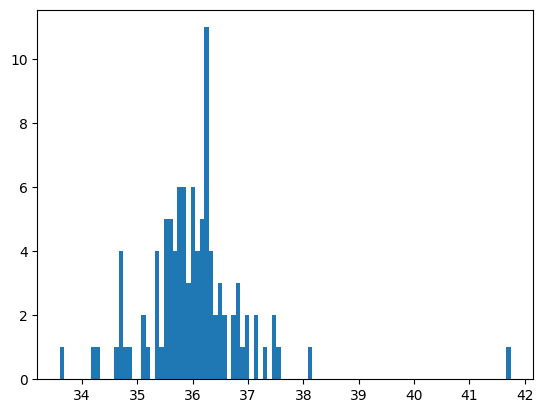

In [28]:
plt.hist(A, bins = 100)

(array([1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
        3., 1., 5., 3., 3., 2., 4., 7., 8., 8., 7., 5., 9., 4., 4., 1., 1.,
        4., 5., 1., 1., 1., 1., 3., 2., 0., 1., 0., 0., 0., 0., 0., 0., 1.,
        0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([1613.88234264, 1619.25106941, 1624.61979619, 1629.98852296,
        1635.35724974, 1640.72597651, 1646.09470329, 1651.46343006,
        1656.83215684, 1662.20088361, 1667.56961039, 1672.93833716,
        1678.30706394, 1683.67579071, 1689.04451749, 1694.41324426,
        1699.78197104, 1705.15069781, 1710.51942459, 1715.88815136,
        1721.25687814, 1726.62560491, 1731.99433169, 1737.36305846,
        1742.73178524, 1748.10051201, 1753.46923879, 1758.83796556,
        1764.20669234, 1769.57541911, 1774.94414589, 1780.31287266,
      

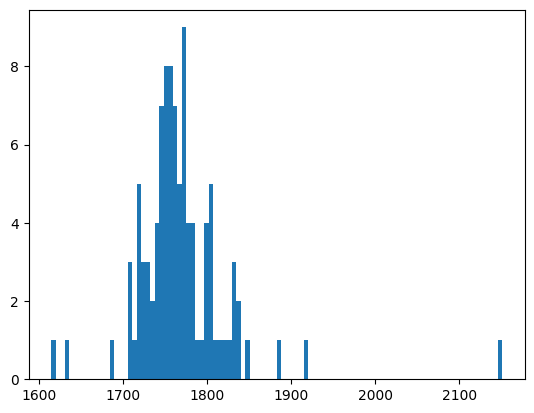

In [29]:
plt.hist(S, bins = 100)

{'whiskers': [<matplotlib.lines.Line2D at 0x2cab8acfe60>,
 'caps': [<matplotlib.lines.Line2D at 0x2cab8acf0e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2cab65fa6c0>],
 'medians': [<matplotlib.lines.Line2D at 0x2cab8acd550>],
 'fliers': [<matplotlib.lines.Line2D at 0x2cab8ace2a0>],
 'means': []}

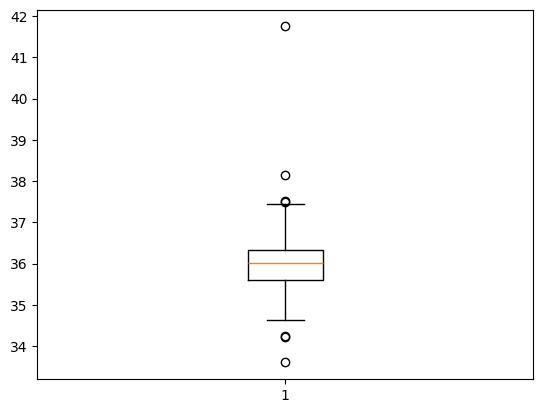

In [33]:
plt.boxplot(A)

{'whiskers': [<matplotlib.lines.Line2D at 0x2cab6672ff0>,
 'caps': [<matplotlib.lines.Line2D at 0x2cab6a27e30>,
 'boxes': [<matplotlib.lines.Line2D at 0x2cab6a3cb00>],
 'medians': [<matplotlib.lines.Line2D at 0x2cab6a26030>],
 'fliers': [<matplotlib.lines.Line2D at 0x2cab6a27b00>],
 'means': []}

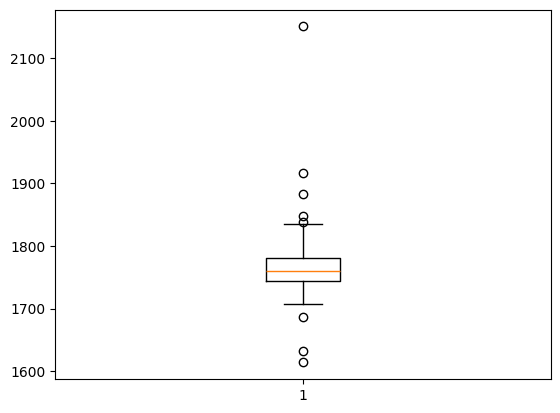

In [34]:
plt.boxplot(S)

<Axes: >

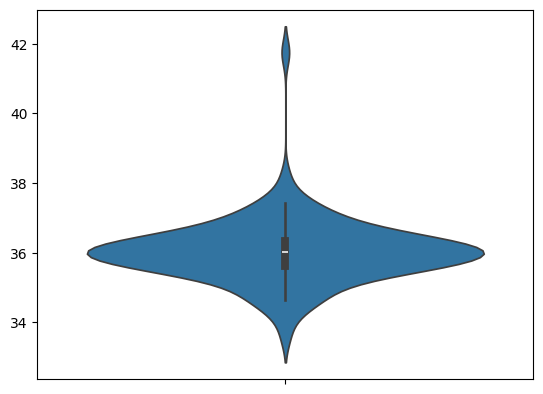

In [35]:
sns.violinplot(A)

<Axes: >

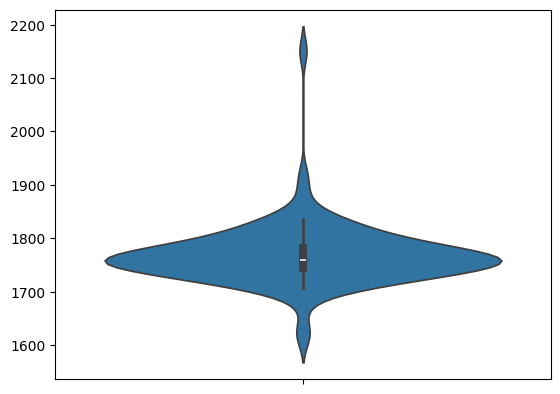

In [36]:
sns.violinplot(S)

In [38]:
print("Распределение a")
print(f"Среднее значение {A.mean()}")
print(f"Дисперсия {A.var()}")
print("Распределение s")
print(f"Среднее значение {S.mean()}")
print(f"Дисперсия {S.var()}")


Распределение a
Среднее значение 36.03151850854008
Дисперсия 0.8752062283237101
Распределение s
Среднее значение 1768.1224370169098
Дисперсия 3307.849643379529
